In [139]:
import numpy as np
import math
import random
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from numpy import asarray
from PIL import Image, ImageOps

Text(0.5, 0, 'Truman_receives_menorah')

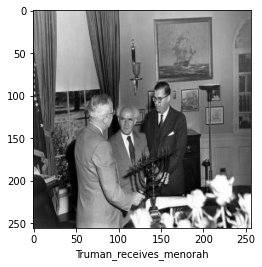

In [140]:
#Open the image as greyscale
img = Image.open(r"./Truman_receives_menorah_256.jpg")
gray_img = ImageOps.grayscale(img)
gray_pixel_values = asarray(gray_img).astype(float)

# Normalize the values to range [0, 1]
for i in range(len(gray_pixel_values)):
  for j in range(len(gray_pixel_values)):
    gray_pixel_values[i][j]= gray_pixel_values[i][j]/256

I = gray_pixel_values
plt.imshow(I, cmap='gray')
plt.xlabel('Truman_receives_menorah')

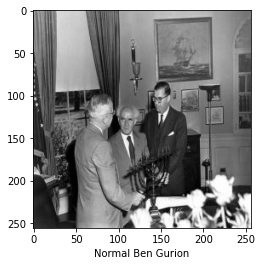

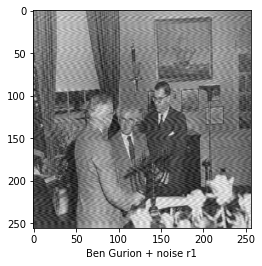

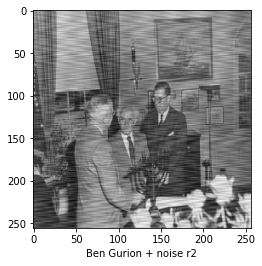

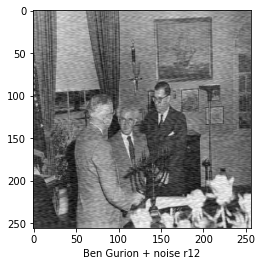

In [141]:
def r_calculation(f, mu = 1/10, sigma = 1/20, n=256) :
  r = np.zeros((n,n))
  A = np.random.normal(mu, sigma, n) 
  phi = np.random.uniform(0,2*math.pi, n)
  for i in range(n) :
    for j in range(n) :
        r[i][j] = A[i]*math.cos(2*math.pi*f*j+phi[i])
  return r

def PhotoPrinting(I,title):
  plt.imshow(I, cmap='gray')
  plt.xlabel(title)
  plt.show()

r1, r2 = r_calculation(1/8), r_calculation(1/32)
I1 = I + r1
I2 = I + r2
I12 = I +(r1+r2)/2

PhotoPrinting(I,'Normal Ben Gurion')
PhotoPrinting(I1,'Ben Gurion + noise r1')
PhotoPrinting(I2,'Ben Gurion + noise r2')
PhotoPrinting(I12,'Ben Gurion + noise r12')

Q2

In [142]:
def PhotoPrintingByDFT(DFT_I, title):
  plt.imshow(np.real(DFT_I), cmap='gray', vmin=0, vmax=1)
  plt.xlabel(title)
  plt.show()

In [ ]:
#Theoritical
from numpy.lib.type_check import real
A = np.random.normal(1/10, 1/20, 256)
phi = np.random.uniform(0,2*math.pi, 256)

def theor_DFT(I, f, A=A, phi=phi) :
  n = np.shape(I)[0]
  In = np.zeros((n,n))
  for i in range(n) :
    for j in range(n) :
      val = 0
      for k in range(n) : 
        val += math.e**(complex(0,-2*math.pi*j*k/n))*I[i][k]
      In[i][j] = real(val/math.sqrt(n) + (A[i]*math.e**(complex(0, phi[i]))*math.sqrt(n)/2)*(j == f*n) + (A[i]*math.e**(complex(0, -phi[i]))*math.sqrt(n)/2)*(j == -f*n))
  return In

In1 = theor_DFT(I, 1/8) 
In2 = theor_DFT(I, 1/32)

PhotoPrintingByDFT(In1, 'Theoritical DFT of I1')
PhotoPrintingByDFT(In2, 'Theoritical DFT of I2')

Q3

In [ ]:
def theor_DFT_w(I, f1=1/8, f2=1/32, w1=1/2, w2=1/2) :
  A1 = np.random.normal(1/10, 1/20, 256)
  phi1 = np.random.uniform(0,2*math.pi, 256)
  A2 = np.random.normal(1/10, 1/20, 256)
  phi2 = np.random.uniform(0,2*math.pi, 256)
  n = I.shape[0]
  In = np.zeros((n,n))
  w = w1 + w2
  W = math.e**(complex(0, -1) * 2 * math.pi / n)
  for i in range(n) :
    for j in range(n) :
      val = 0
      for k in range(n) :
        val+= (W**(i*j))*I[i][j]
      In[i][j] =real(val + ((w1*A1[i]*math.e**(complex(0, phi1[i]))*math.sqrt(n))/(2*(w1+w2)))*(j==f1*n) + ((w2*A2[i]*math.e**(complex(0, phi2[i]))*math.sqrt(n))/(2*(w1+w2)))*(j==f2*n) + ((w1*A1[i]*math.e**(complex(0, -phi1[i]))*math.sqrt(n))/(2*(w1+w2)))*(j==-f1*n) + ((w2*A2[i]*math.e**(complex(0, -phi2[i]))*math.sqrt(n))/(2*(w1+w2)))*(j==-f2*n))
  return In
  
In12_w = theor_DFT_w(I)
PhotoPrintingByDFT(In12_w, 'Theoritical DFT of I12')

Q4

In [ ]:
#Here the DFT representation of the noisy images
def DFT_Matrix() :
  n = 256
  return np.array([[math.e**(complex(0,-2*math.pi*k*j/n)) for k in range(n)] for j in range(n)])

DFT_I1 = np.dot(np.dot(DFT_Matrix(), I1), DFT_Matrix())
DFT_I2 = np.dot(np.dot(DFT_Matrix(), I2), DFT_Matrix())
DFT_I12 = np.dot(np.dot(DFT_Matrix(), I12), DFT_Matrix())

PhotoPrintingByDFT(DFT_I1, 'DFT of I1')
PhotoPrintingByDFT(DFT_I2, 'DFT of I2')
PhotoPrintingByDFT(DFT_I12, 'DFT of I12')

Q5

In [ ]:
from numpy.ma.extras import intersect1d
def mse(I, Ibis,I_str):
    mse = (1/I.shape[0]*2) * (np.linalg.norm((I-Ibis)*2))
    print("MSE of "+I_str+" is: "+str(mse))
    return mse

mse(I1, In1,"I1" )
mse(I2, In2,"I2")
mse(I12, In12_w,"I12")

def filter(I, f) :
  n = I.shape[0]
  I[:,int(n//(1/f))] = 0
  I[:,int(n-(n//(1/f)))] = 0
  return I

PhotoPrinting(filter(I1, 1/8),"I1")
PhotoPrinting(filter(I2, 1/32),"I2")